# [Assignment 3 - Data Analytics in Action](https://canvas.uts.edu.au/courses/30539/assignments/172296)


- Decision Trees (Wk 7)
- Evaluating Classifiers (Wk 8)
- Linear Modelling and Neural Networks (Wk 9)
- SVM (Wk 10)
- Ensemble Methods and Random Forests (Wk 11)

1. select features check Wk 4 Data preparation
2. compare models of imputed vs removed vs averaged entries
   - do this for each model

### Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATAFILE = "./dataGaia_AB_train.csv"
gaia = pd.read_csv(DATAFILE)

In [4]:
# Converts SpType-ELS labels to to {'A': 0, 'B':1}
get_label =  lambda x: 0 if re.match("[AB]", x)[0] == "A" else 1
gaia["SpType-ELS"] = gaia["SpType-ELS"].apply(get_label)

In [5]:
# Drops unnecessary columns
data = gaia.drop(["Unnamed: 0"], axis=1)
data.head().T

,0,1,2,3,4
ID,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
RA_ICRS,4.437519e+01,4.295930e+01,4.403108e+01,4.546360e+01,4.378416e+01
DE_ICRS,2.895901e+00,2.920459e+00,3.203683e+00,3.138095e+00,3.486814e+00
Source,1.400000e+15,1.550000e+15,1.610000e+15,1.750000e+15,2.060000e+15
Plx,1.893700e+00,2.973200e+00,2.233700e+00,4.017900e+00,1.164580e+01
PM,1.695400e+01,2.528000e+00,1.077600e+01,1.005300e+01,3.235500e+01
pmRA,7.031000e+00,1.795000e+00,-3.151000e+00,1.828000e+00,2.968800e+01
pmDE,-1.542700e+01,1.780000e+00,-1.030500e+01,9.885000e+00,-1.286300e+01
Gmag,1.036916e+01,1.003898e+01,9.810181e+00,8.163041e+00,6.855547e+00
e_Gmag,2.801000e-03,2.774000e-03,2.786000e-03,2.800000e-03,2.779000e-03


In [6]:
data.isna().describe().T

,count,unique,top,freq
ID,148538,1,False,148538
RA_ICRS,148538,1,False,148538
DE_ICRS,148538,1,False,148538
Source,148538,1,False,148538
Plx,148538,1,False,148538
PM,148538,1,False,148538
pmRA,148538,1,False,148538
pmDE,148538,1,False,148538
Gmag,148538,1,False,148538
e_Gmag,148538,1,False,148538


<Axes: >

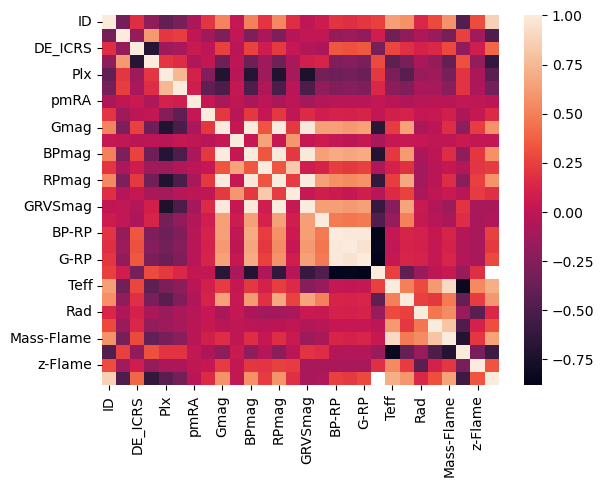

In [7]:
# See correlations between features
matrix = data.corr(method="pearson")
sns.heatmap(matrix, annot=False)

In [8]:
matrix[(matrix["SpType-ELS"]>0.5) | (matrix["SpType-ELS"]<-0.5)]["SpType-ELS"]

ID            0.863172
Source       -0.625606
Gmag          0.579398
BPmag         0.566933
RPmag         0.587500
Teff          0.703806
Dist          0.599478
Mass-Flame    0.650493
Age-Flame    -0.577920
SpType-ELS    1.000000
Name: SpType-ELS, dtype: float64

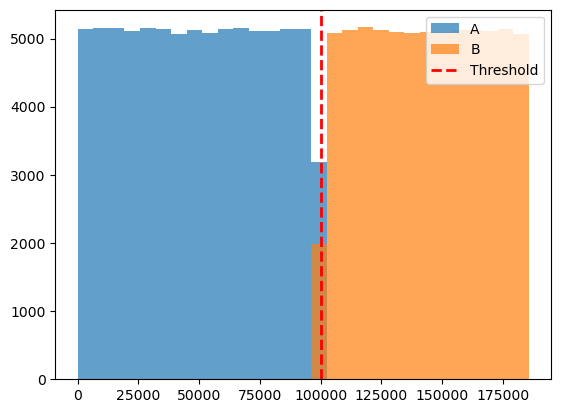

{'whiskers': [<matplotlib.lines.Line2D at 0x254acd91c70>,
 'caps': [<matplotlib.lines.Line2D at 0x254acda81f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x254acd919d0>,
 'medians': [<matplotlib.lines.Line2D at 0x254acda8730>,
 'fliers': [<matplotlib.lines.Line2D at 0x254acda89d0>,
 'means': []}

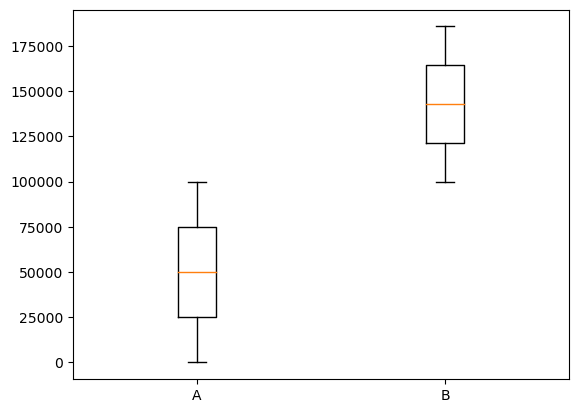

In [9]:
# ID seems to be a very clear indicator of types
# First impression appears as though the attribute is linearly
data_A = data[data["SpType-ELS"]==0]["ID"]
data_B = data[data["SpType-ELS"]==1]["ID"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=100000, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()
plt.boxplot([data_A, data_B], labels=["A", "B"])

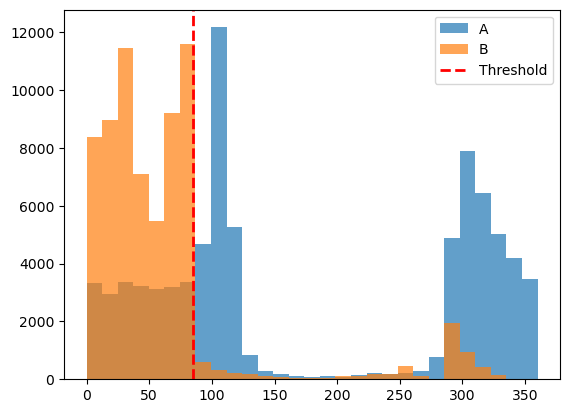

<function matplotlib.pyplot.show(close=None, block=None)>

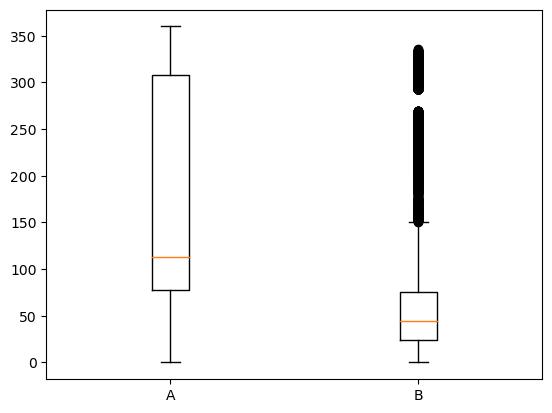

In [10]:
# It appears as though B type is far more right skewed
# For both types, there aren't many entries between 150 and 300
# Label B has positive outliers from 150 to 350
# You can somewhat draw a line at the point of 75 where most values on the left side will be B and on the right A
# However, entries on the left side of the line still have a considerable chance to actually be A values
data_A = data[data["SpType-ELS"]==0]["RA_ICRS"]
data_B = data[data["SpType-ELS"]==1]["RA_ICRS"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=85, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.show

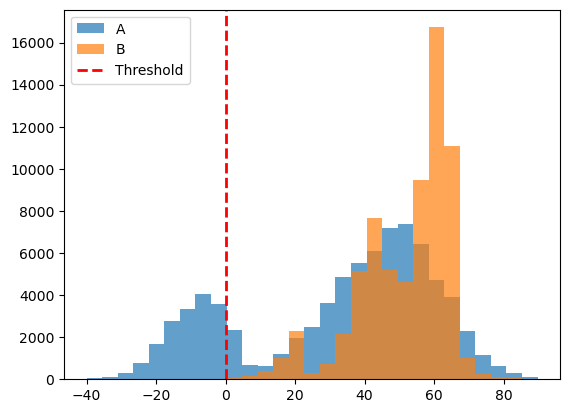

<function matplotlib.pyplot.show(close=None, block=None)>

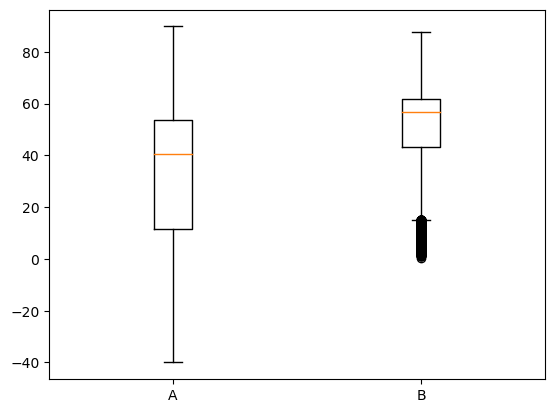

In [11]:
# Type B has a narrower range compared to A
# It would be difficult to distinguish A and B labels using this feature alone as their distributions overlap
# There could be a case for entries less than or equal to zero being more likely to be labelled as A
data_A = data[data["SpType-ELS"]==0]["DE_ICRS"]
data_B = data[data["SpType-ELS"]==1]["DE_ICRS"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=0, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.show

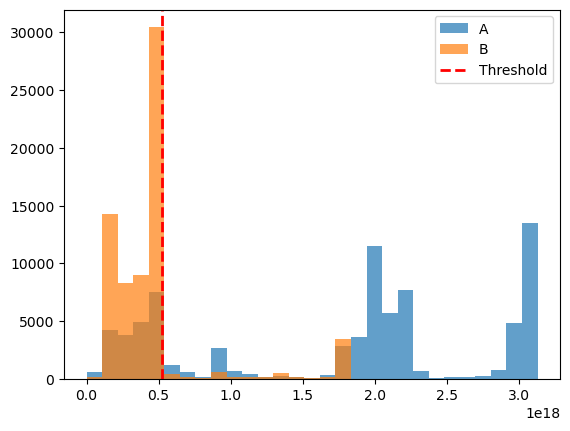

{'whiskers': [<matplotlib.lines.Line2D at 0x254acf5a280>,
 'caps': [<matplotlib.lines.Line2D at 0x254acf5a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x254acf4dfa0>,
 'medians': [<matplotlib.lines.Line2D at 0x254acf5ad00>,
 'fliers': [<matplotlib.lines.Line2D at 0x254acf5afa0>,
 'means': []}

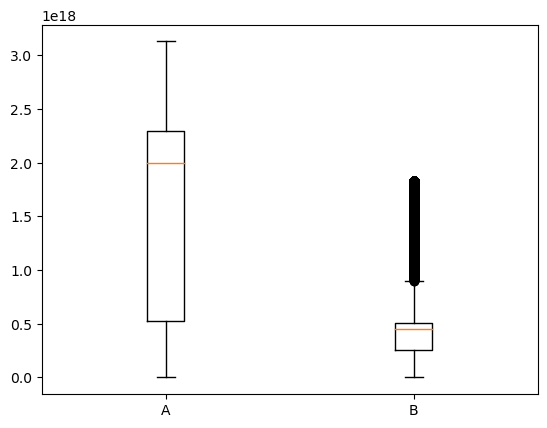

In [12]:
# A has a greater range compared to B
# Appears separable with a soft margin
data_A = data[data["SpType-ELS"]==0]["Source"]
data_B = data[data["SpType-ELS"]==1]["Source"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=0.525*1e18, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

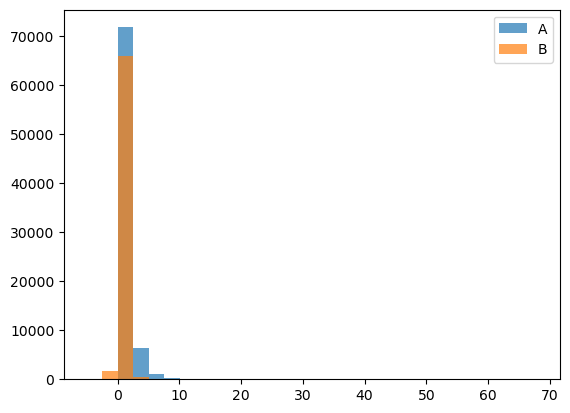

<function matplotlib.pyplot.show(close=None, block=None)>

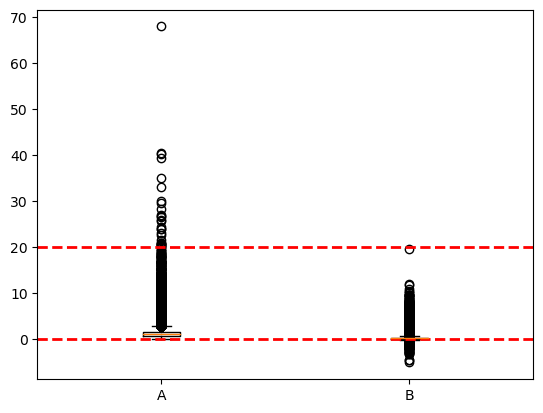

In [13]:
# Most values appear around 0 to 10, it looks like for both types there are quite a few outliers
# Most values occur around 0 for both A and B
# Boxplot shows that <0 is almost always B and >20 is almost always A
data_A = data[data["SpType-ELS"]==0]["Plx"]
data_B = data[data["SpType-ELS"]==1]["Plx"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)

plt.hist(data[data["SpType-ELS"]==0]["Plx"], label="A", alpha=0.7, bins=bins)
plt.hist(data[data["SpType-ELS"]==1]["Plx"], label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.axhline(y=20, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.show

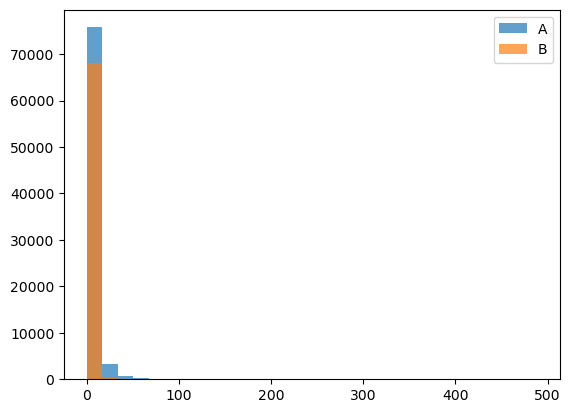

<function matplotlib.pyplot.show(close=None, block=None)>

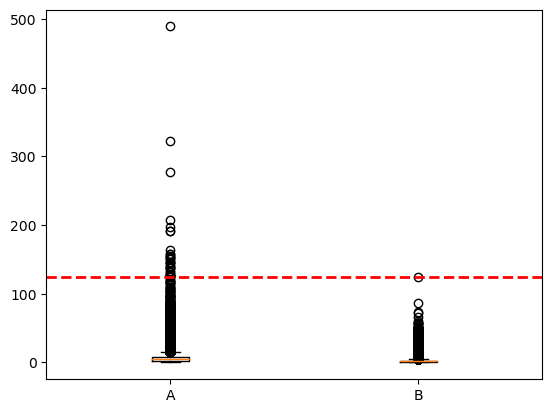

In [14]:
# Most values occur at around 0
# There are quite a few outliers for both A and B
# From the outliers indicated in the boxplots it seems that A values are more likely to have a PM of >125

data_A = data[data["SpType-ELS"]==0]["PM"]
data_B = data[data["SpType-ELS"]==1]["PM"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.axhline(y=125, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.show

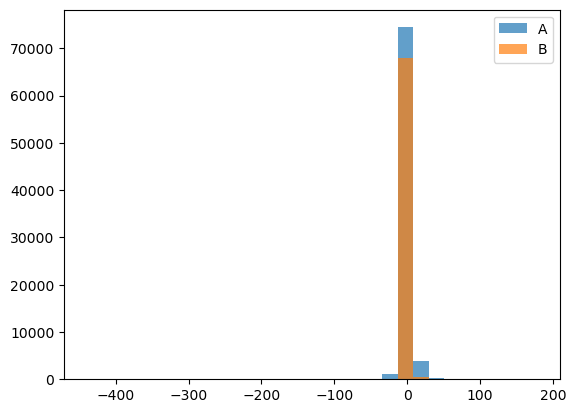

<function matplotlib.pyplot.show(close=None, block=None)>

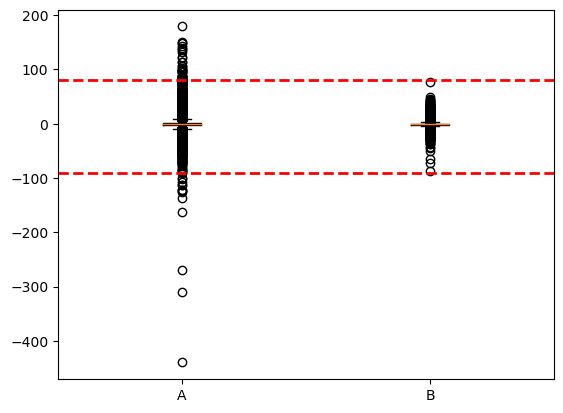

In [15]:
# B values don't appear to have moved left or right that much compared to A
# Most values for both A and B haven't moved
# For the majority of values, neither of them have shifted a large distance
# Hence, there are quite a few outliers for values that have moved a greater distance
# Even for outliers, B has a limited range. The outliers falling outside this range seem to be only A values
data_A = data[data["SpType-ELS"]==0]["pmRA"]
data_B = data[data["SpType-ELS"]==1]["pmRA"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.axhline(y=-90, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.axhline(y=80, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.show

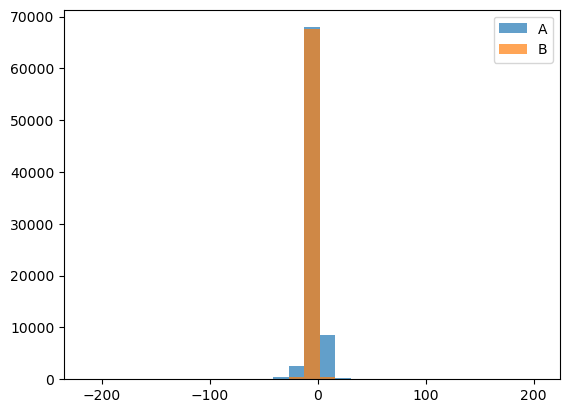

<function matplotlib.pyplot.show(close=None, block=None)>

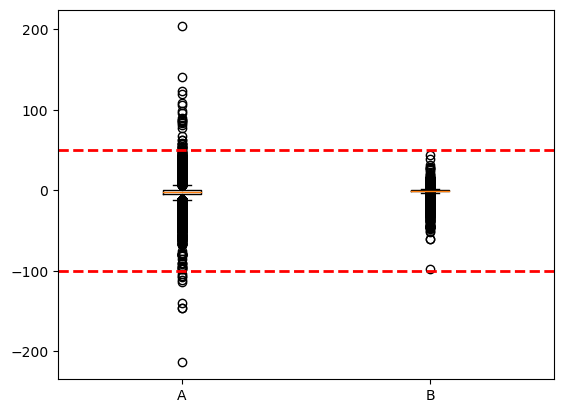

In [16]:
# A values appear to have moved up and down more compared to B values
# For both values, neither appear to have moved a great distance
# Hence, both values contain outliers for points that have moved a greater distance.
data_A = data[data["SpType-ELS"]==0]["pmDE"]
data_B = data[data["SpType-ELS"]==1]["pmDE"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.axhline(y=50, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.axhline(y=-100, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.show

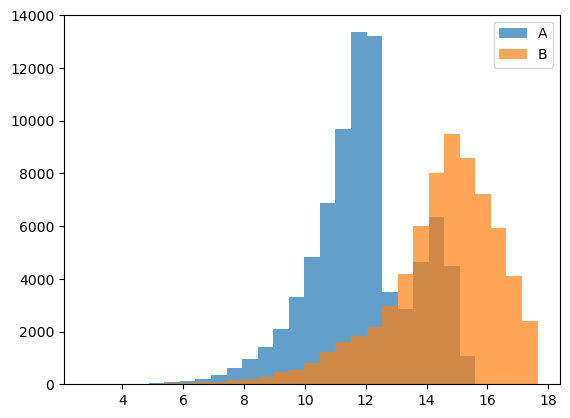

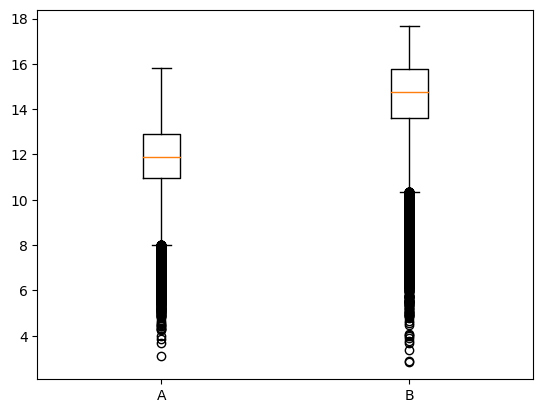

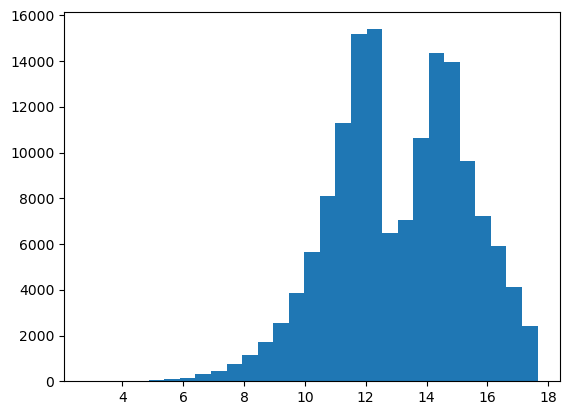

In [17]:
# B values are left skewed more than A values
# B values are ditributed further to the right
# Appears separable with a soft margin as there are two distinct distributions for A and B values
data_A = data[data["SpType-ELS"]==0]["Gmag"]
data_B = data[data["SpType-ELS"]==1]["Gmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.show()

plt.hist(data["Gmag"], bins=bins)
plt.show()

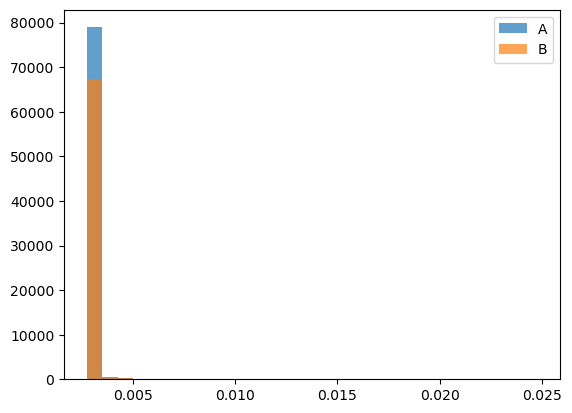

{'whiskers': [<matplotlib.lines.Line2D at 0x254ac2de190>,
 'caps': [<matplotlib.lines.Line2D at 0x254ac2de6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x254adc47eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x254ac2dec10>,
 'fliers': [<matplotlib.lines.Line2D at 0x254ac2deeb0>,
 'means': []}

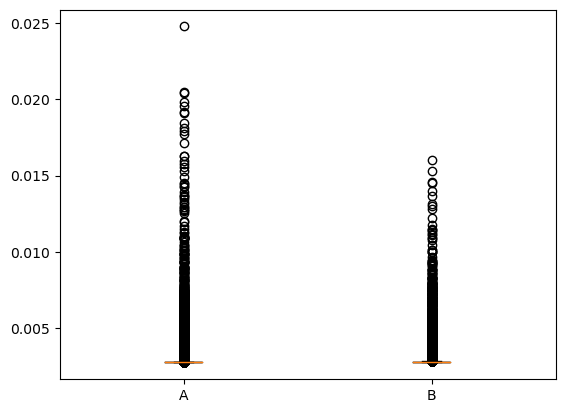

In [18]:
# Most error values occur between 0 and 0.005
# Would assume that the error is correlated with the distance but it doesn't seem like it given the correlation matrix
# A has a slightly larger error range though this is only because of a few outliers and likely isn't indicative of
# much
data_A = data[data["SpType-ELS"]==0]["e_Gmag"]
data_B = data[data["SpType-ELS"]==1]["e_Gmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

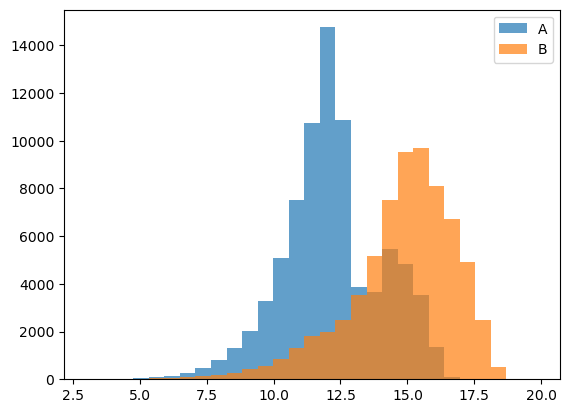

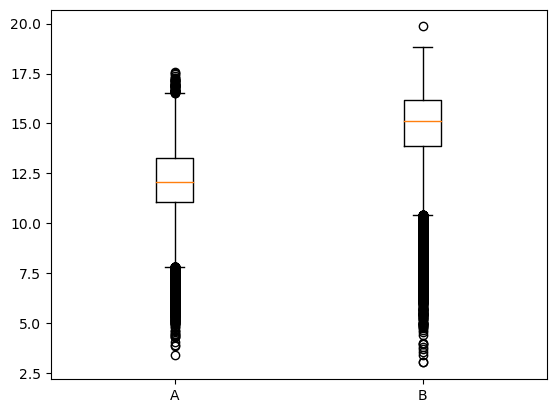

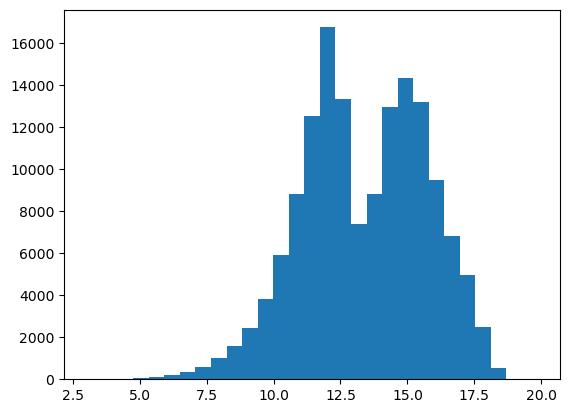

In [19]:
# Similar to Gmag, B type is more left skewed compared to A values
# B values are ditributed further to the right
# like Gmag, it appears somewhat separable as there are two distinct distributions of A and B values
data_A = data[data["SpType-ELS"]==0]["BPmag"]
data_B = data[data["SpType-ELS"]==1]["BPmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.show()

plt.hist(data["BPmag"], bins=bins)
plt.show()

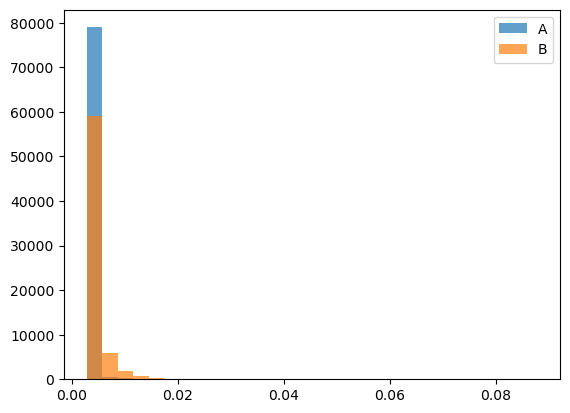

{'whiskers': [<matplotlib.lines.Line2D at 0x254ad5bc130>,
 'caps': [<matplotlib.lines.Line2D at 0x254ad5bc670>,
 'boxes': [<matplotlib.lines.Line2D at 0x254ad5acf70>,
 'medians': [<matplotlib.lines.Line2D at 0x254ad5bcbb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x254ad5bce50>,
 'means': []}

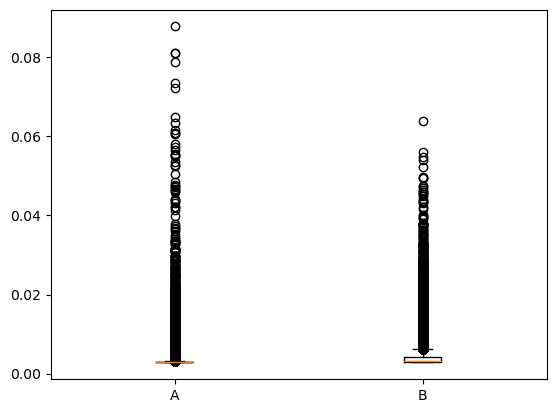

In [20]:
# Has a greater error range compared to Gmag 0 to 0.02
# Does not appear particularly indicative of A and B labels
data_A = data[data["SpType-ELS"]==0]["e_BPmag"]
data_B = data[data["SpType-ELS"]==1]["e_BPmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

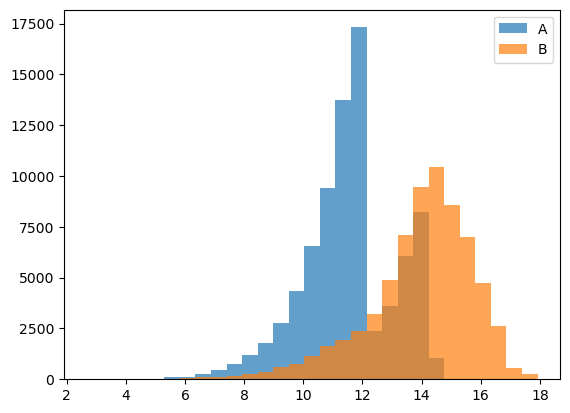

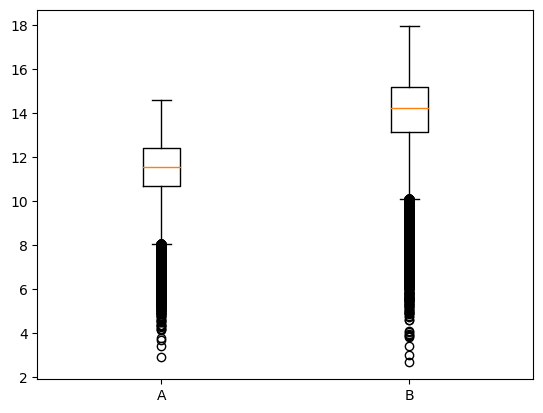

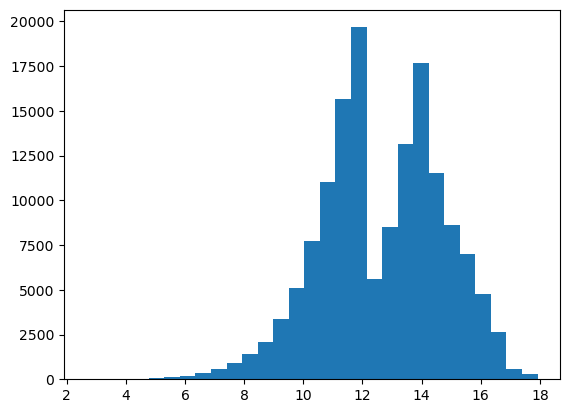

In [21]:
# Following the same trend, B values are more left skewed compared to A values
# B values are ditributed further to the right
# Same with previous mag scores there appears to be two distinct distributions
data_A = data[data["SpType-ELS"]==0]["RPmag"]
data_B = data[data["SpType-ELS"]==1]["RPmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])
plt.show()

plt.hist(data["RPmag"], bins=bins)
plt.show()

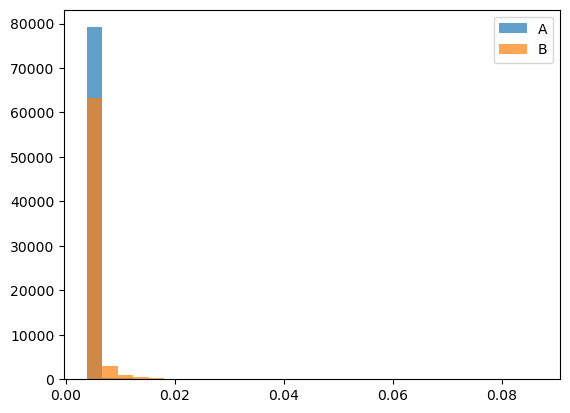

{'whiskers': [<matplotlib.lines.Line2D at 0x254acdd21f0>,
 'caps': [<matplotlib.lines.Line2D at 0x254acddd130>,
 'boxes': [<matplotlib.lines.Line2D at 0x254acdd2070>,
 'medians': [<matplotlib.lines.Line2D at 0x254acc3d670>,
 'fliers': [<matplotlib.lines.Line2D at 0x254acab7790>,
 'means': []}

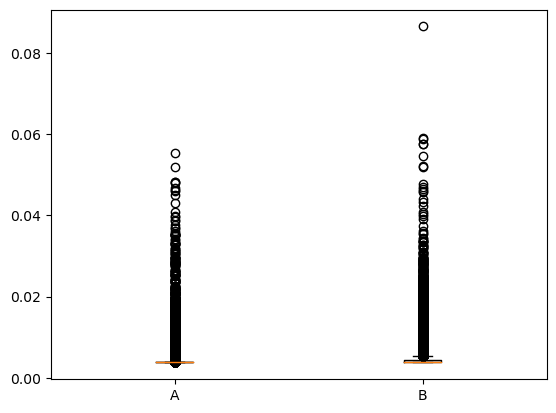

In [22]:
# Compared to previous errors it appears that B labels have a wider range compared to A labels
# Not indicative
data_A = data[data["SpType-ELS"]==0]["e_RPmag"]
data_B = data[data["SpType-ELS"]==1]["e_RPmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

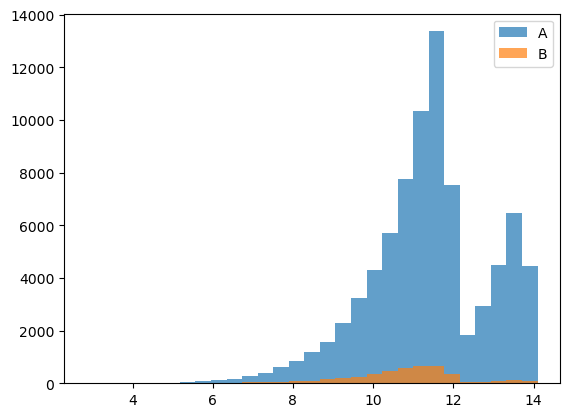

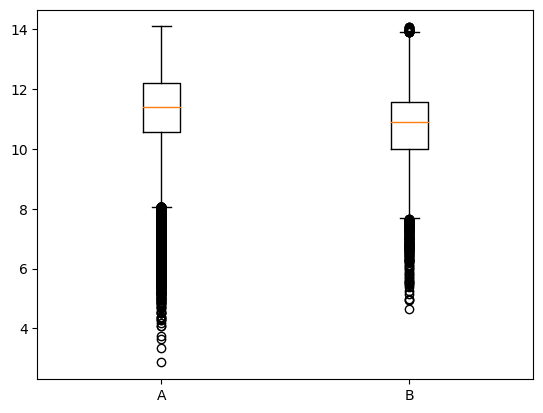

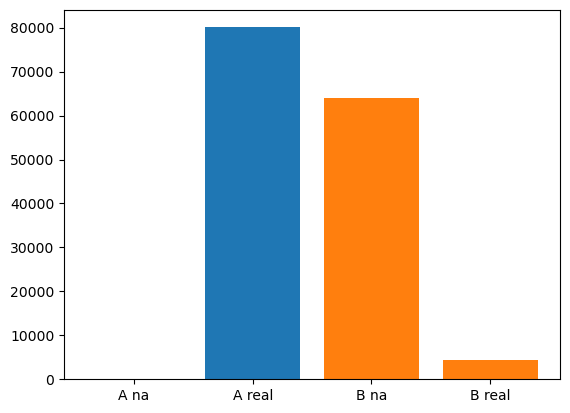

count     80088
unique        1
top       False
freq      80088
Name: GRVSmag, dtype: object
count     68450
unique        2
top        True
freq      64054
Name: GRVSmag, dtype: object


In [24]:
# Boxplot doesn't appear for B label
# Closer inspection shows that the majority of B values are null
# In comparison, A label has no null values
data_A = data[data["SpType-ELS"]==0]["GRVSmag"]
data_B = data[data["SpType-ELS"]==1]["GRVSmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B.dropna()], labels=["A", "B"])
plt.show()

count_lf_b = len(data_B)
real_b = len(data_B.dropna())
na_b = count_lf_b - real_b

count_lf_a = len(data_A)
real_a = len(data_A.dropna())
na_a = count_lf_a - real_a

plt.bar(["A na", "A real"], [na_a,real_a])
plt.bar(["B na", "B real"], [na_b,real_b])
plt.show()

print(data_A.isna().describe())
print(data_B.isna().describe())

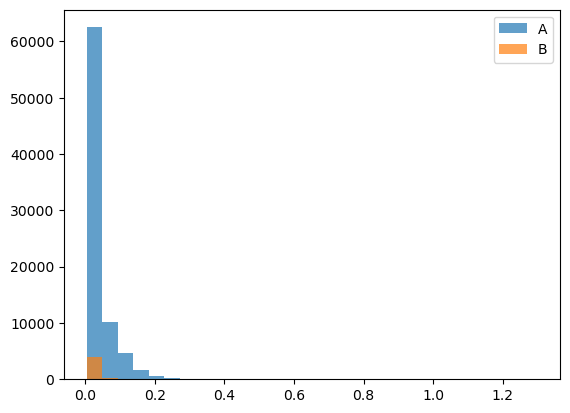

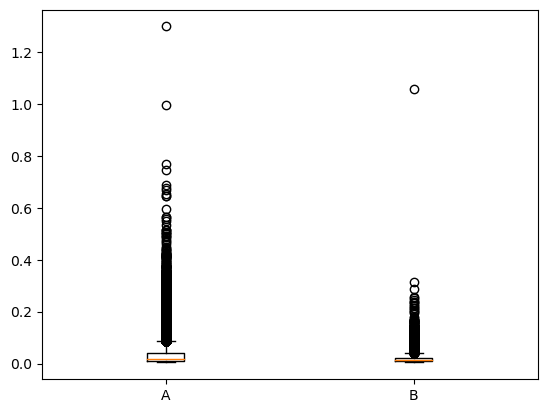

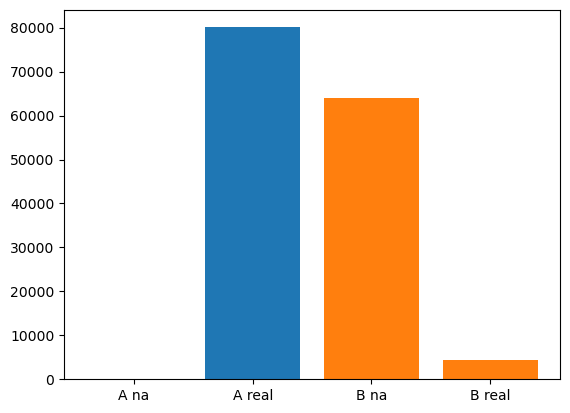

count     80088
unique        1
top       False
freq      80088
Name: e_GRVSmag, dtype: object
count     68450
unique        2
top        True
freq      64054
Name: e_GRVSmag, dtype: object


In [25]:
# Range 0 to 0.3 which is quite a bit larger than previous error values
# There are a couple of outliers for both A and B that occur a great distance from their normal range of distribution
# majority of B values are null
data_A = data[data["SpType-ELS"]==0]["e_GRVSmag"]
data_B = data[data["SpType-ELS"]==1]["e_GRVSmag"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B.dropna()], labels=["A", "B"])   # Boxplot breaks if it contains null values
plt.show()

count_lf_b = len(data_B)
real_b = len(data_B.dropna())
na_b = count_lf_b - real_b

count_lf_a = len(data_A)
real_a = len(data_A.dropna())
na_a = count_lf_a - real_a

plt.bar(["A na", "A real"], [na_a,real_a])
plt.bar(["B na", "B real"], [na_b,real_b])
plt.show()

print(data_A.isna().describe())
print(data_B.isna().describe())

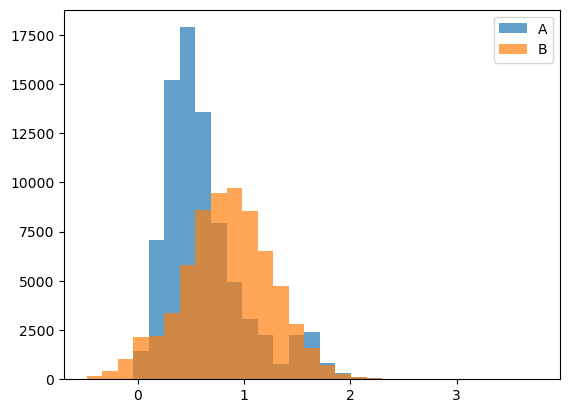

{'whiskers': [<matplotlib.lines.Line2D at 0x29c0ec9f490>,
 'caps': [<matplotlib.lines.Line2D at 0x29c0ec9f9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c0ec9f1f0>,
 'medians': [<matplotlib.lines.Line2D at 0x29c0ec9ff10>,
 'fliers': [<matplotlib.lines.Line2D at 0x29c0ec751f0>,
 'means': []}

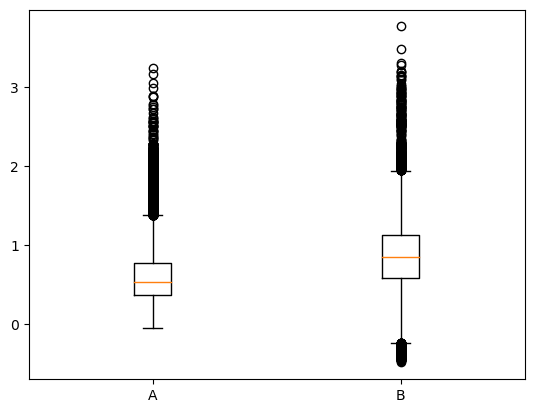

In [25]:
# B is normally distributed between 0 and 2
# A is right skewed
# Difficult to separate as the distributions are mostly overlapping
data_A = data[data["SpType-ELS"]==0]["BP-RP"]
data_B = data[data["SpType-ELS"]==1]["BP-RP"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

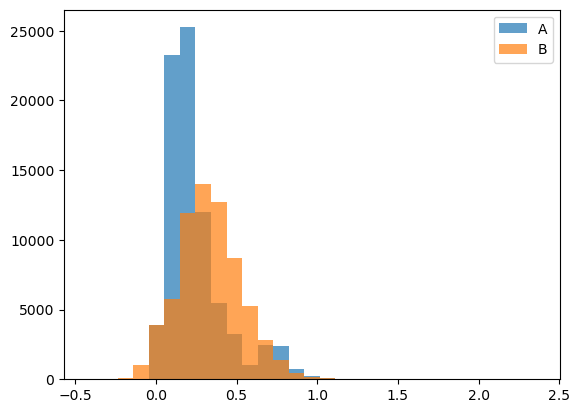

{'whiskers': [<matplotlib.lines.Line2D at 0x29c0eac3490>,
 'caps': [<matplotlib.lines.Line2D at 0x29c0eac39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c0eac31f0>,
 'medians': [<matplotlib.lines.Line2D at 0x29c0eac3f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x29c0f04f6a0>,
 'means': []}

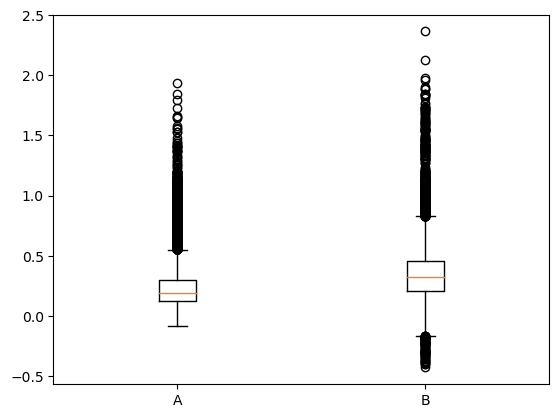

In [26]:
# B values are more evenly distributed compared to A values
# Most A values occur around 0 to 0.25
# Difficult to separate as the distributions are mostly overlapping
data_A = data[data["SpType-ELS"]==0]["BP-G"]
data_B = data[data["SpType-ELS"]==1]["BP-G"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

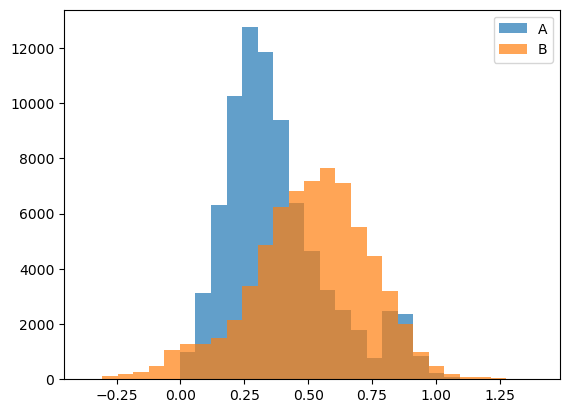

{'whiskers': [<matplotlib.lines.Line2D at 0x29c0f263ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x29c0f274460>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c0f263c40>,
 'medians': [<matplotlib.lines.Line2D at 0x29c0ef9e880>,
 'fliers': [<matplotlib.lines.Line2D at 0x29c0ef9edf0>,
 'means': []}

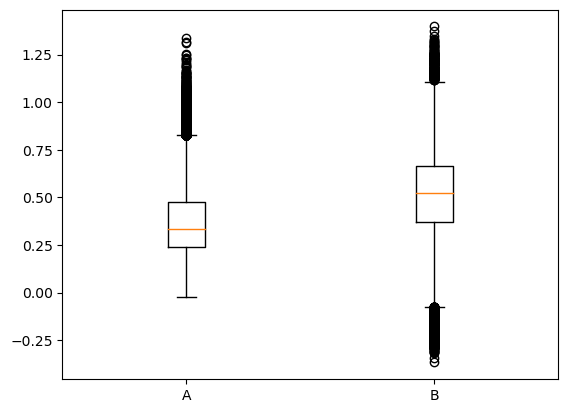

In [27]:
# B values are ditributed further to the right
# B values are more evenly distributed
# B values are left skewed
# A values are right skewed
# Not indicative, mostly overlapping
data_A = data[data["SpType-ELS"]==0]["G-RP"]
data_B = data[data["SpType-ELS"]==1]["G-RP"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

c:\Users\cyrus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\cyrus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6764: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


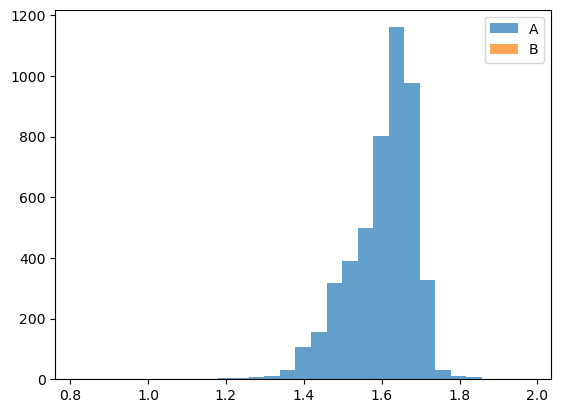

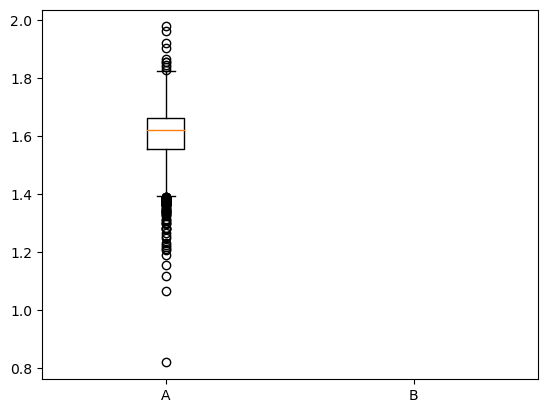

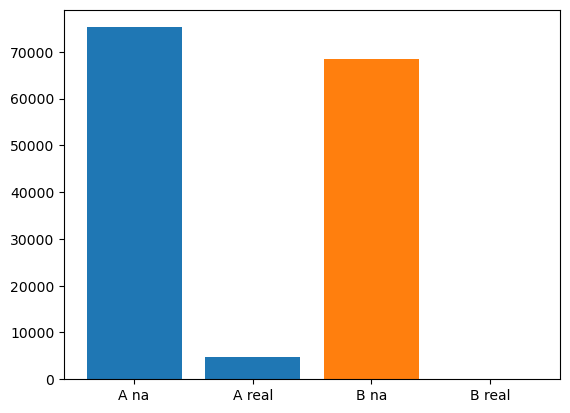

count     80088
unique        2
top        True
freq      75235
Name: pscol, dtype: object
count     68450
unique        1
top        True
freq      68450
Name: pscol, dtype: object


In [32]:
# Although pscol has many missing values and is unlikely to provide much information
# it should be noted that no entry labelled as B has a pscol value
# This information maybe useful during feature engineering

data_A = data[data["SpType-ELS"]==0]["pscol"]
data_B = data[data["SpType-ELS"]==1]["pscol"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A.dropna(), data_B.dropna()], labels=["A", "B"])   # Boxplot breaks if it contains null values
plt.show()

count_lf_b = len(data_B)
real_b = len(data_B.dropna())
na_b = count_lf_b - real_b

count_lf_a = len(data_A)
real_a = len(data_A.dropna())
na_a = count_lf_a - real_a

plt.bar(["A na", "A real"], [na_a,real_a])
plt.bar(["B na", "B real"], [na_b,real_b])
plt.show()

print(data_A.isna().describe())
print(data_B.isna().describe())

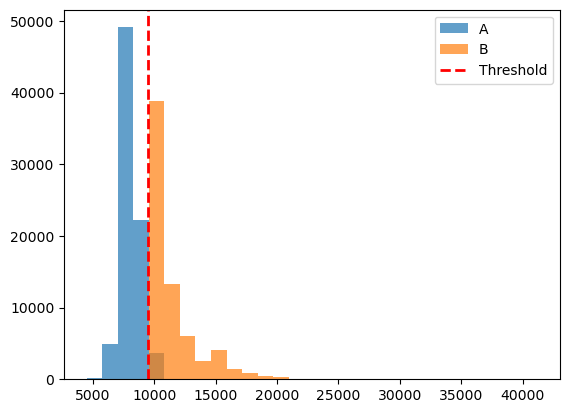

{'whiskers': [<matplotlib.lines.Line2D at 0x262002c5970>,
 'caps': [<matplotlib.lines.Line2D at 0x262002b4ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x262002c5640>,
 'medians': [<matplotlib.lines.Line2D at 0x262002b4e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x262002b4400>,
 'means': []}

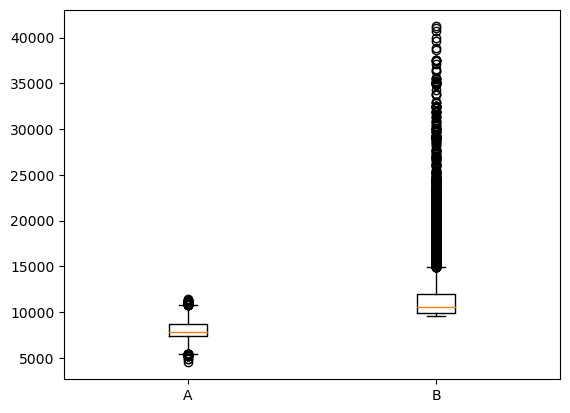

In [43]:
# B values have a far larger distribution range compared to A values
# A values occur between 5000 and 10000 while B values occur between 10000 and 40000
# Appears to be quite a good differentiator between A and B values

data_A = data[data["SpType-ELS"]==0]["Teff"]
data_B = data[data["SpType-ELS"]==1]["Teff"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=9500, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

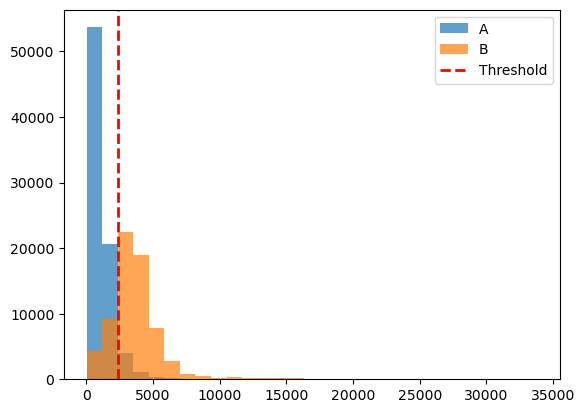

{'whiskers': [<matplotlib.lines.Line2D at 0x26200333e80>,
 'caps': [<matplotlib.lines.Line2D at 0x2620031b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x26200333be0>,
 'medians': [<matplotlib.lines.Line2D at 0x2620031b940>,
 'fliers': [<matplotlib.lines.Line2D at 0x2620031bbe0>,
 'means': []}

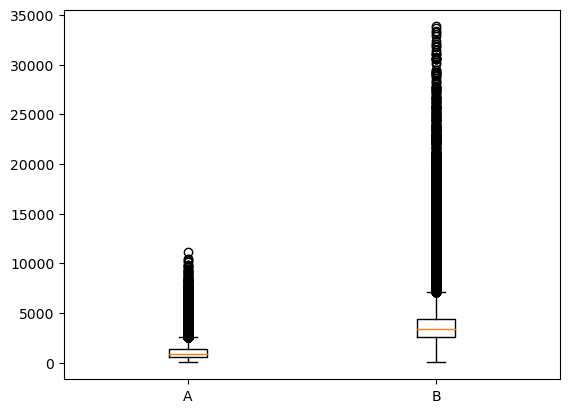

In [45]:
# B values are more evenly distributed
# B values occur in a wider range
# A (0 to 5000) B (0 to 20000)
# Appear somewhat separable 
data_A = data[data["SpType-ELS"]==0]["Dist"]
data_B = data[data["SpType-ELS"]==1]["Dist"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=2400, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

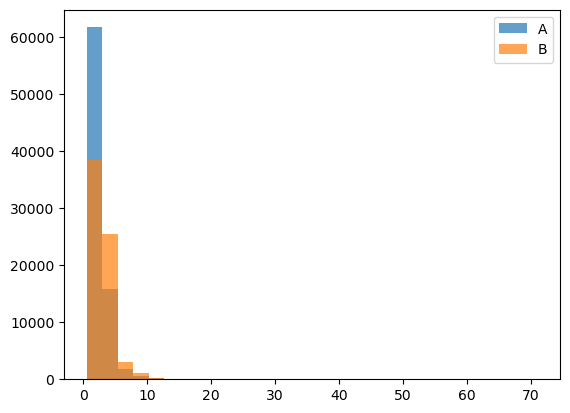

{'whiskers': [<matplotlib.lines.Line2D at 0x13fe9208430>,
 'caps': [<matplotlib.lines.Line2D at 0x13fe9073070>,
 'boxes': [<matplotlib.lines.Line2D at 0x13fe8f9d0a0>,
 'medians': [<matplotlib.lines.Line2D at 0x13fe9073ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13fe9073910>,
 'means': []}

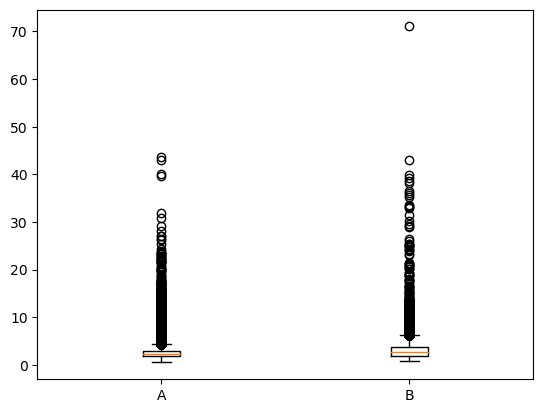

In [149]:
# B values have a larger distribution
# A (0 to 10) B (0 to 15)
# Too much overlap to be indicative
data_A = data[data["SpType-ELS"]==0]["Rad"]
data_B = data[data["SpType-ELS"]==1]["Rad"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B], labels=["A", "B"])

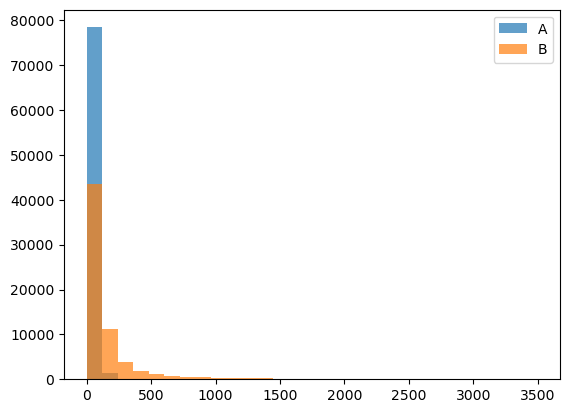

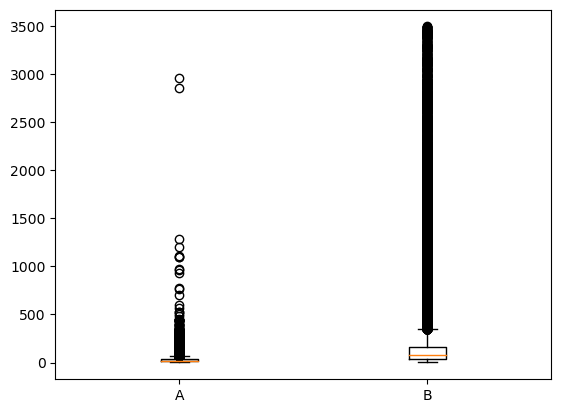

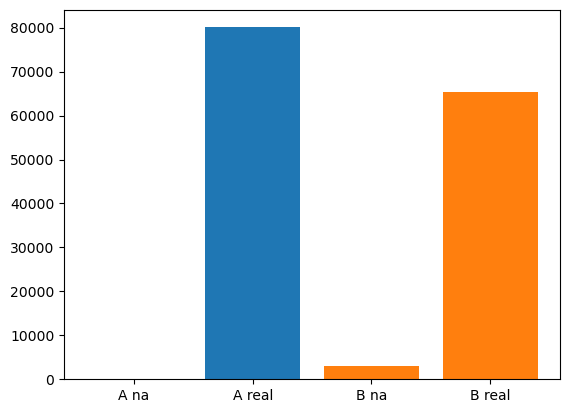

count     80088
unique        1
top       False
freq      80088
Name: Lum-Flame, dtype: object
count     68450
unique        2
top       False
freq      65455
Name: Lum-Flame, dtype: object


In [26]:
# B has a wider range of values
# About 3000 B values are null
# Too much overlap to be indicative
data_A = data[data["SpType-ELS"]==0]["Lum-Flame"]
data_B = data[data["SpType-ELS"]==1]["Lum-Flame"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B.dropna()], labels=["A", "B"])   # Boxplot breaks if it contains null values
plt.show()

count_lf_b = len(data_B)
real_b = len(data_B.dropna())
na_b = count_lf_b - real_b

count_lf_a = len(data_A)
real_a = len(data_A.dropna())
na_a = count_lf_a - real_a

plt.bar(["A na", "A real"], [na_a,real_a])
plt.bar(["B na", "B real"], [na_b,real_b])
plt.show()

print(data_A.isna().describe())
print(data_B.isna().describe())

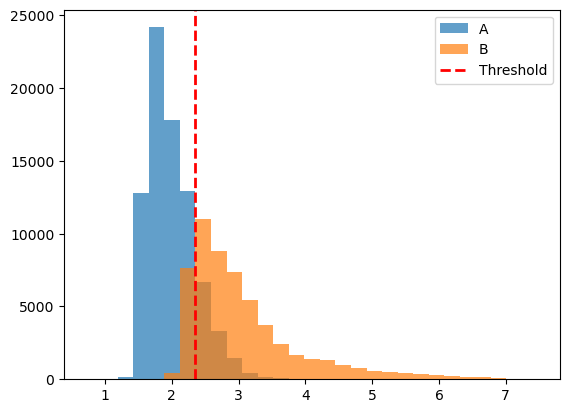

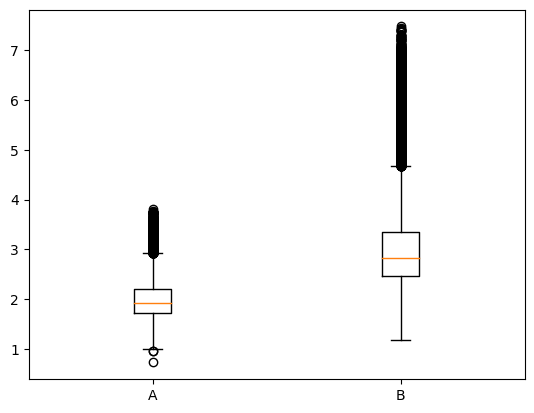

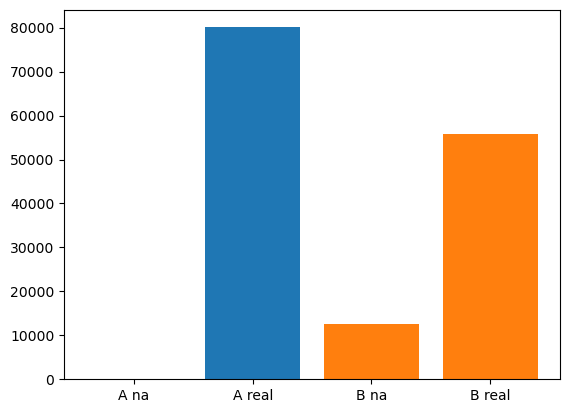

count     80088
unique        1
top       False
freq      80088
Name: Mass-Flame, dtype: object
count     68450
unique        2
top       False
freq      55899
Name: Mass-Flame, dtype: object


In [27]:
# A values are complete
# 13000 missing B values
# B has a wider distribution of values
# A values are distributed further to the left
# B values are heavily right skewed
# Appears somewhat separable
data_A = data[data["SpType-ELS"]==0]["Mass-Flame"]
data_B = data[data["SpType-ELS"]==1]["Mass-Flame"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=2.35, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()

plt.boxplot([data_A, data_B.dropna()], labels=["A", "B"])   # Boxplot breaks if it contains null values
plt.show()

count_lf_b = len(data_B)
real_b = len(data_B.dropna())
na_b = count_lf_b - real_b

count_lf_a = len(data_A)
real_a = len(data_A.dropna())
na_a = count_lf_a - real_a

plt.bar(["A na", "A real"], [na_a,real_a])
plt.bar(["B na", "B real"], [na_b,real_b])
plt.show()

print(data_A.isna().describe())
print(data_B.isna().describe())

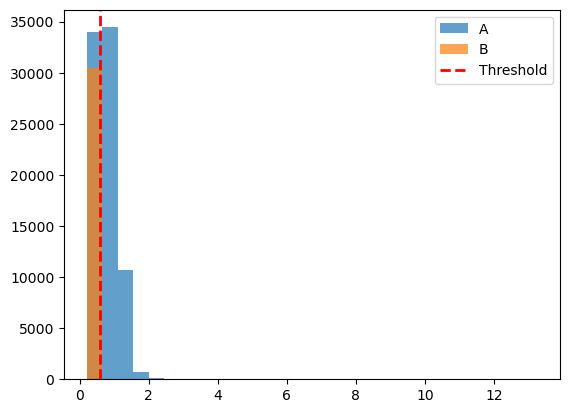

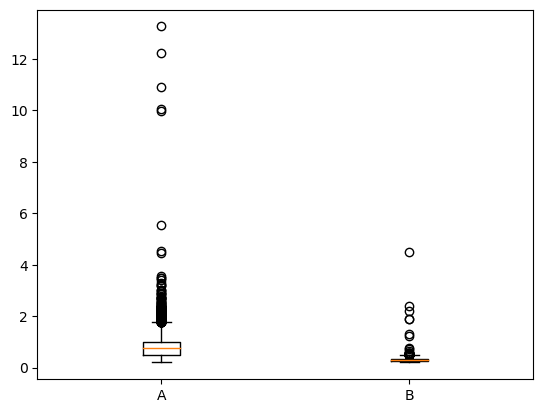

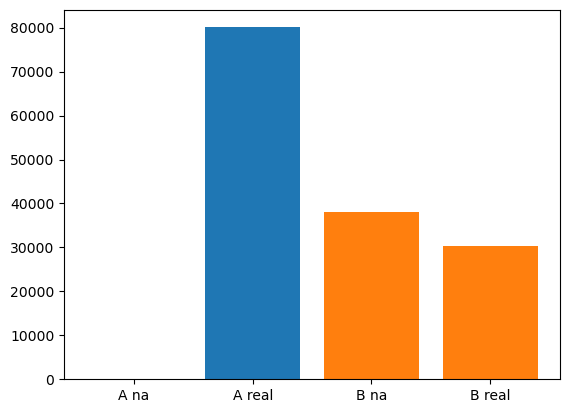

count     80088
unique        1
top       False
freq      80088
Name: Age-Flame, dtype: object
count     68450
unique        2
top        True
freq      38016
Name: Age-Flame, dtype: object


In [28]:
# Most B values are missing
# There is a wider distribution of A values than there are B values
# Too much overlap to be indicative however, soft margin could be drawn to separate main distributions
data_A = data[data["SpType-ELS"]==0]["Age-Flame"]
data_B = data[data["SpType-ELS"]==1]["Age-Flame"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.axvline(x=0.6, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.legend()
plt.show()

plt.boxplot([data_A, data_B.dropna()], labels=["A", "B"])   # Boxplot breaks if it contains null values
plt.show()

count_lf_b = len(data_B)
real_b = len(data_B.dropna())
na_b = count_lf_b - real_b

count_lf_a = len(data_A)
real_a = len(data_A.dropna())
na_a = count_lf_a - real_a

plt.bar(["A na", "A real"], [na_a,real_a])
plt.bar(["B na", "B real"], [na_b,real_b])
plt.show()

print(data_A.isna().describe())
print(data_B.isna().describe())

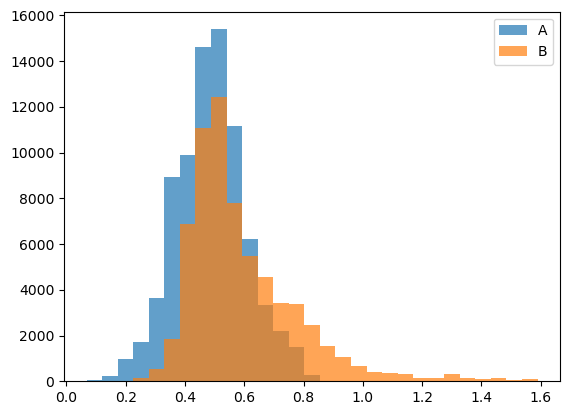

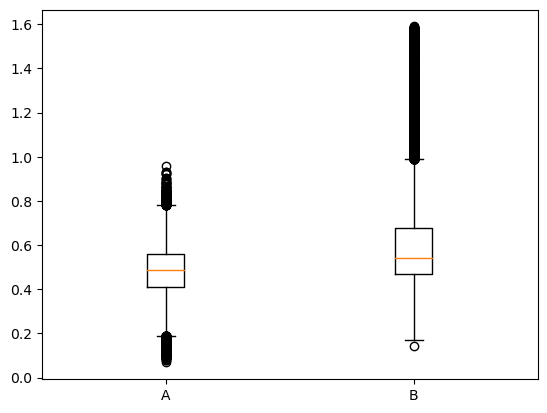

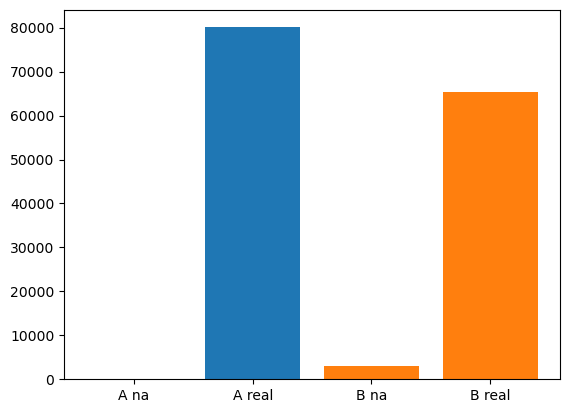

count     80088
unique        1
top       False
freq      80088
Name: z-Flame, dtype: object
count     68450
unique        2
top       False
freq      65455
Name: z-Flame, dtype: object


In [29]:
# Both A and B values appear normally distributed
# Only a few missing B values
# Too much overlap to be indicative
data_A = data[data["SpType-ELS"]==0]["z-Flame"]
data_B = data[data["SpType-ELS"]==1]["z-Flame"]

min_bin = min(data_A.min(), data_B.min())
max_bin = max(data_A.max(), data_B.max())

bins = np.linspace(min_bin, max_bin, 30)
plt.hist(data_A, label="A", alpha=0.7, bins=bins)
plt.hist(data_B, label="B", alpha=0.7, bins=bins)
plt.legend()
plt.show()

plt.boxplot([data_A, data_B.dropna()], labels=["A", "B"])   # Boxplot breaks if it contains null values
plt.show()

count_lf_b = len(data_B)
real_b = len(data_B.dropna())
na_b = count_lf_b - real_b

count_lf_a = len(data_A)
real_a = len(data_A.dropna())
na_a = count_lf_a - real_a

plt.bar(["A na", "A real"], [na_a,real_a])
plt.bar(["B na", "B real"], [na_b,real_b])
plt.show()

print(data_A.isna().describe())
print(data_B.isna().describe())

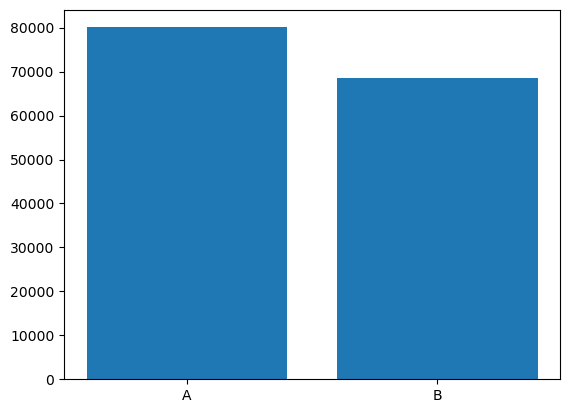

In [121]:
# More A values than there are B values
data_A = data[data["SpType-ELS"]==0]["SpType-ELS"].count()
data_B = data[data["SpType-ELS"]==1]["SpType-ELS"].count()
plt.bar(["A", "B"], [data_A,data_B])
plt.show()